In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from numpy import corrcoef
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('kidney_disease.csv', index_col = 'id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna()

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


In [6]:
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [8]:
pearsoncorr = x_train.corr(method='pearson')
pearsoncorr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.010298,-0.314882,0.272065,0.262349,-0.126243,-0.189518,0.131963,0.064808,0.320910,...,-0.265542,-0.233317,-0.177152,-0.307969,0.408429,0.360053,0.265009,0.212396,0.306485,0.102482
bp,0.010298,1.000000,-0.169754,0.300260,0.244019,-0.284890,-0.166493,0.281879,0.144867,0.152901,...,-0.236419,-0.294335,-0.022519,-0.250016,0.309950,0.113914,0.220141,0.159296,0.080792,0.306239
sg,-0.314882,-0.169754,1.000000,-0.659814,-0.473679,0.481614,0.614043,-0.448926,-0.516943,-0.563980,...,0.671585,0.657562,0.290057,0.634727,-0.640579,-0.656103,-0.456369,-0.497104,-0.617570,-0.347008
al,0.272065,0.300260,-0.659814,1.000000,0.526763,-0.439495,-0.791819,0.529613,0.543527,0.479205,...,-0.796140,-0.744253,-0.261261,-0.679872,0.810160,0.674544,0.385311,0.582199,0.622564,0.549333
su,0.262349,0.244019,-0.473679,0.526763,1.000000,-0.232616,-0.517804,0.249362,0.373099,0.653632,...,-0.398181,-0.389338,-0.057314,-0.412590,0.588692,0.608445,0.622132,0.203427,0.464118,0.210572
rbc,-0.126243,-0.284890,0.481614,-0.439495,-0.232616,1.000000,0.499910,-0.245485,-0.189982,-0.482620,...,0.470007,0.501657,0.171808,0.421526,-0.458726,-0.462548,-0.311162,-0.519843,-0.262449,-0.245485
pc,-0.189518,-0.166493,0.614043,-0.791819,-0.517804,0.499910,1.000000,-0.600003,-0.530521,-0.521939,...,0.741121,0.691962,0.174312,0.682008,-0.682557,-0.681977,-0.414815,-0.508200,-0.604137,-0.531150
pcc,0.131963,0.281879,-0.448926,0.529613,0.249362,-0.245485,-0.600003,1.000000,0.504876,0.296766,...,-0.551897,-0.451340,-0.220848,-0.506334,0.423587,0.420535,0.434924,0.381656,0.363479,0.447368
ba,0.064808,0.144867,-0.516943,0.543527,0.373099,-0.189982,-0.530521,0.504876,1.000000,0.266486,...,-0.434558,-0.466047,-0.087133,-0.373971,0.347555,0.329009,0.374591,0.254722,0.417120,0.204808
bgr,0.320910,0.152901,-0.563980,0.479205,0.653632,-0.482620,-0.521939,0.296766,0.266486,1.000000,...,-0.412959,-0.428212,-0.167091,-0.442999,0.544765,0.687587,0.512576,0.380878,0.440863,0.095227


<AxesSubplot:>

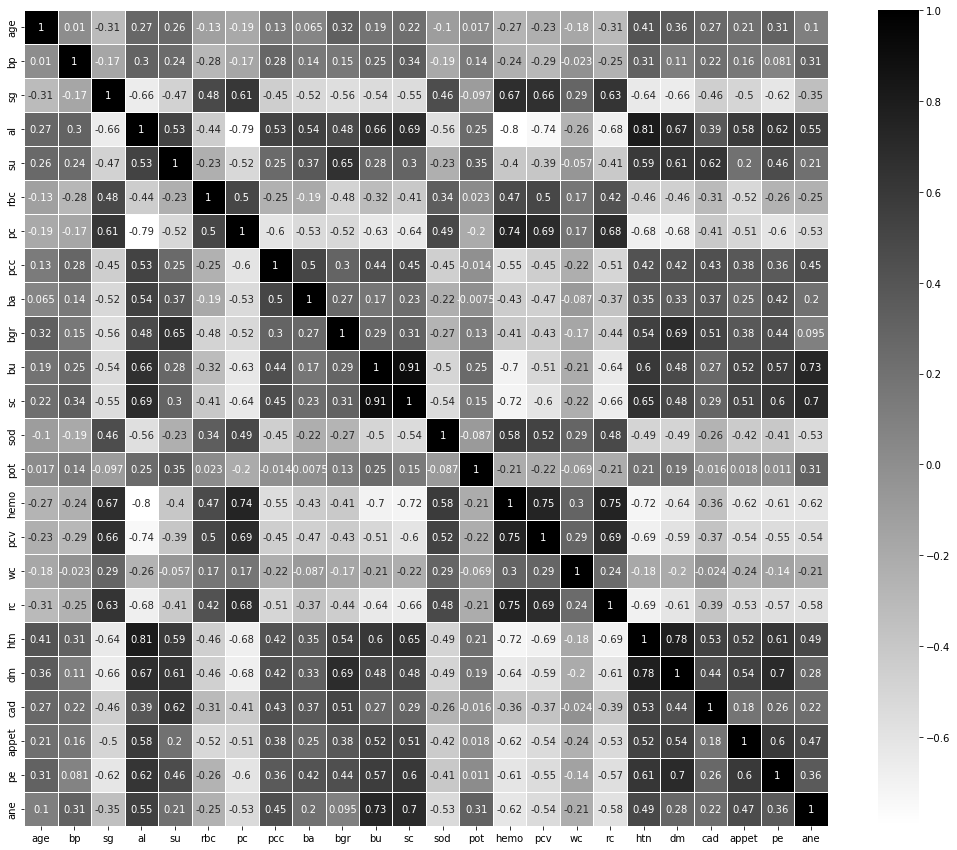

In [9]:
plt.figure(figsize = (18,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)

In [10]:
#Selecting highly correlated features using Pearsons Correlation
def correlation(threshold):
    col_corr = set()
    corr_matrix = pearsoncorr
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
            #if (corr_matrix.iloc[i, j] > threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [11]:
#select features with 75% threshold
corr_features = correlation(0.75)
corr_features

{'dm', 'htn', 'sc'}

In [12]:
#Correlation matrix and upper triangular matrix
cm = pearsoncorr.abs()
ut = cm.where(np.triu(np.ones(cm.shape),k=1).astype(bool))
todrop = {column for column in ut.columns if any(ut[column] > 0.75)}
todrop

{'dm', 'hemo', 'htn', 'pc', 'sc'}

In [13]:
#MRMr implementation

class MRMR:
    def __init__(self, df, target_name, difference_or_quotient='difference'):
        self.df = df
        self.idxs_by_class = [df[df[target_name] == v].index for v in df[target_name].unique()]
        self.features = [col for col in df.columns if col != target_name]
        self.ranked_features = []
        self.feature_relevance = {feat_name: self.calc_feature_relevance(self.df[feat_name]) for feat_name in
                                  self.features}
        self.use_difference = difference_or_quotient == 'difference'
        self.calculated_correlations = {}

    def calc_feature_relevance(self, feature):
        groups = [feature[class_idxs].values for class_idxs in self.idxs_by_class]
        return f_oneway(*groups).statistic

    def calc_feature_redundancy(self, feature):
        redundancy = 0
        for feat in self.ranked_features:
            if (feat, feature) not in self.calculated_correlations:
                self.calculated_correlations[(feat, feature)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])
                self.calculated_correlations[(feature, feat)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])

            redundancy += self.calculated_correlations[(feat, feature)]
        return redundancy

    def rank_features(self):
        most_important_feature = max(self.feature_relevance.items(), key=operator.itemgetter(1))[0]
        self.ranked_features.append(most_important_feature)

        while len(self.ranked_features) != len(self.features):
            top_importance = 0
            most_important_feature = None
            for feat in self.features:
                if feat in self.ranked_features:
                    continue

                feature_redundancy = self.calc_feature_redundancy(feat)
                feature_relevance = self.feature_relevance[feat]
                if self.use_difference:
                    importance = feature_relevance - feature_redundancy
                else:
                    importance = feature_relevance / feature_redundancy

                if importance > top_importance:
                    top_importance = importance
                    most_important_feature = feat

            self.ranked_features.append(most_important_feature)

        return self.ranked_features

In [14]:
different_ranking_methods = {}

In [15]:
f_scores = f_classif(x, y)[0]
f_scores = pd.Series(f_scores, index=[col for col in df.columns if col!='classification']).sort_values(ascending=False)
different_ranking_methods['anova_f_statistic'] = f_scores.index

In [16]:
mrmr = MRMR(df, 'classification')
different_ranking_methods['mrmr_difference_based'] = mrmr.rank_features()

In [17]:
mrmr = MRMR(df, 'classification', difference_or_quotient='quotient')
different_ranking_methods['mrmr_quotient_based'] = mrmr.rank_features()

In [18]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
rfc_features = pd.Series(model.feature_importances_, index=mrmr.features).sort_values(ascending=False)
different_ranking_methods['random_forest_feature_ranking'] = rfc_features.index

In [19]:
pd.DataFrame(different_ranking_methods)

,anova_f_statistic,mrmr_difference_based,mrmr_quotient_based,random_forest_feature_ranking
0,al,al,al,al
1,htn,htn,htn,hemo
2,hemo,hemo,hemo,pcv
3,pcv,pcv,sg,rc
4,sg,sg,pcv,sc
5,pc,pc,pc,sg
6,dm,dm,dm,bu
7,rc,rc,rc,htn
8,sc,sc,sc,pc
9,bu,bu,bu,dm


In [20]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=y, K=10)
print(selected_features)
print(corr_features)
print(todrop)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 133.58it/s]

['al', 'htn', 'hemo', 'sg', 'pcv', 'pc', 'dm', 'rc', 'sc', 'bu']
{'htn', 'dm', 'sc'}
{'sc', 'pc', 'dm', 'htn', 'hemo'}


In [21]:
selected_features = [i for i in selected_features if i not in corr_features.union(todrop)]
selected_features

['al', 'sg', 'pcv', 'rc', 'bu']

In [22]:
#https://github.com/smazzanti/mrmr
#https://elliot-weissberg.medium.com/another-feature-selection-algorithm-mrmr-3827b6b19e33

Weight for the classification accuracy [0-1]: .75
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 7 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 8 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 9 - Fitness: 0.859375, Number of Features: 9
Particle 10 - Fitness: 0.8515625, Number of Features: 12
Particle 11 - Fitness: 0.8411458333333334, Number of Feature


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 4 - Fitness: 0.9140625, Number of Features: 6
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8828125, Number of Features: 9
Particle 8 - Fitness: 0.8828125, Number of Features: 9
Particle 9 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 10 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 11 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 12 - Fitness: 0.859375, Number of Features: 9
Particle 13 - Fitness: 0.859375, Number of Features: 9
Particle 14 - Fitness: 0.859375, Number of Features


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9583333333333334
Number of Features: 4
----------------------------------------

Particle 1 - Fitness: 0.9583333333333334, Number of Features: 4
Particle 2 - Fitness: 0.9375, Number of Features: 6
Particle 3 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 4 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 5 - Fitness: 0.90625, Number of Features: 9
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 9 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 10 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 11 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 12 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 13 - Fitness: 0.8541666666666666, Number of Features: 5
Particle 14 - Fitness: 0.85


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 4 - Fitness: 0.90625, Number of Features: 9
Particle 5 - Fitness: 0.90625, Number of Features: 9
Particle 6 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 7 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 8 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 9 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 10 - Fitness: 0.8828125, Number of Features: 9
Particle 11 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 12 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 - Fitness: 0.859375, Numb


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 4 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 5 - Fitness: 0.890625, Number of Features: 6
Particle 6 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 7 - Fitness: 0.8828125, Number of Features: 9
Particle 8 - Fitness: 0.8828125, Number of Features: 9
Particle 9 - Fitness: 0.8828125, Number of Features: 9
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 13 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 14 - Fitness: 0.859375, Number of Features: 9
Particle 15 - Fitness: 0.859375, Number of F


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9244791666666666
Number of Features: 5
----------------------------------------

Particle 1 - Fitness: 0.9244791666666666, Number of Features: 5
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.9140625, Number of Features: 6
Particle 4 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8828125, Number of Features: 9
Particle 7 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 8 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 9 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 10 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 11 - Fitness: 0.8515625, Number of Features: 12
Particle 12 - Fitness: 0.84375, Number of Features: 15
Particle 13 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 14 - Fitness: 0.8333333333333


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9479166666666666
Number of Features: 5
----------------------------------------

Particle 1 - Fitness: 0.9479166666666666, Number of Features: 5
Particle 2 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 6 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 7 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 8 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8333333333333334, Number of Features: 7
Particle 11 - Fitness: 0.828125, Number of Features: 12
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9375
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9375, Number of Features: 6
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 5 - Fitness: 0.875, Number of Features: 12
Particle 6 - Fitness: 0.875, Number of Features: 12
Particle 7 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 8 - Fitness: 0.859375, Number of Features: 9
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.828125, Number of Features: 12
Particle 14 - Fitness: 0.8229166666666666, Number of Features: 17
Particle 15 - 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8828125
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.8828125, Number of Features: 9
Particle 2 - Fitness: 0.875, Number of Features: 12
Particle 3 - Fitness: 0.875, Number of Features: 12
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 7 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 8 - Fitness: 0.859375, Number of Features: 9
Particle 9 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 10 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 11 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 14 - Fitness: 0.8307291666666666, Number of 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8776041666666666, Number of Features: 5
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 6 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.828125, Number of Features: 12
Particle 12 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 13 - Fitness: 0.8098958333333334, Number of Features: 16
Particle 14 - Fitness: 0.8072916666666666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 6 - Fitness: 0.859375, Number of Features: 9
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 9 - Fitness: 0.8515625, Number of Features: 12
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.84375, Number of Features: 15
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8203125, Number of Features: 15
Particle 14 - Fitness: 0.8151041666666666, Number of Features: 11
Parti


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.875
Number of Features: 12
----------------------------------------

Particle 1 - Fitness: 0.875, Number of Features: 12
Particle 2 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 3 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 4 - Fitness: 0.84375, Number of Features: 15
Particle 5 - Fitness: 0.8359375, Number of Features: 9
Particle 6 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 7 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 8 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 9 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 10 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.8098958333333334,


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8854166666666666
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.875, Number of Features: 12
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 7 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 8 - Fitness: 0.8515625, Number of Features: 12
Particle 9 - Fitness: 0.8515625, Number of Features: 12
Particle 10 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 11 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 14 - Fitness: 0.8385416666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 5 - Fitness: 0.875, Number of Features: 12
Particle 6 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 7 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 8 - Fitness: 0.859375, Number of Features: 9
Particle 9 - Fitness: 0.859375, Number of Features: 9
Particle 10 - Fitness: 0.84375, Number of Features: 15
Particle 11 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.8359375, Number of Features: 9
Particle 14 - Fitness: 0.828125, Number of Features:


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.890625, Number of Features: 6
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 5 - Fitness: 0.859375, Number of Features: 9
Particle 6 - Fitness: 0.859375, Number of Features: 9
Particle 7 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 8 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 11 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 12 - Fitness: 0.8333333333333334, Number of Features: 7
Particle 13 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 14 - Fitness: 0.828125


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9375
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9375, Number of Features: 6
Particle 2 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 3 - Fitness: 0.875, Number of Features: 12
Particle 4 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 5 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8515625, Number of Features: 12
Particle 8 - Fitness: 0.8515625, Number of Features: 12
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 11 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.8359375, Number of Features: 9
Particle 14 - Fitness: 0.8177083333333334, Number of Features: 13
Part


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8854166666666666
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 9 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 10 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 11 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8229166666666666, Number of Features: 17
Particle 14 - Fitness: 0.


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8958333333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 2 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 5 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 6 - Fitness: 0.859375, Number of Features: 9
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 9 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 10 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 11 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 12 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 13 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 14 - Fitness: 0.817


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9166666666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8828125, Number of Features: 9
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 7 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 8 - Fitness: 0.8515625, Number of Features: 12
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.828125, Number of Features: 12
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 14 - Fitness: 0.8


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 7 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 8 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 9 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 10 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 11 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 12 - Fitness: 0.8515625, Number of Features: 12
Particle 13 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 14 - Fi


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8958333333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8671875, Number of Features: 6
Particle 5 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 6 - Fitness: 0.859375, Number of Features: 9
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.8359375, Number of Features: 9
Particle 12 - Fitness: 0.828125, Number of Features: 12
Particle 13 - Fitness: 0.8229166666666666, Number of Features: 8
Particle 14 - Fitness: 0.822916666666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8854166666666666
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 2 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8828125, Number of Features: 9
Particle 5 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 6 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 7 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 8 - Fitness: 0.8515625, Number of Features: 12
Particle 9 - Fitness: 0.84375, Number of Features: 15
Particle 10 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 11 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.828125, Number of Features: 12
Particle 14 - Fitness: 0.828125, Num


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8854166666666666
Number of Features: 11
----------------------------------------

Particle 1 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 2 - Fitness: 0.875, Number of Features: 12
Particle 3 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 4 - Fitness: 0.8671875, Number of Features: 6
Particle 5 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 6 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 7 - Fitness: 0.8515625, Number of Features: 12
Particle 8 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 9 - Fitness: 0.84375, Number of Features: 15
Particle 10 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 11 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 12 - Fitness: 0.8359375, Number of Features: 9
Particle 13 - Fitness: 0.828125, Number of Features: 12
Particle 14 - Fitness: 0.828125, Number of Features: 12
Par

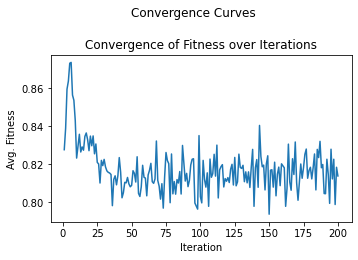

In [23]:
from Py_FS.wrapper.nature_inspired.PSO import PSO as pso
solution = pso(num_agents=30, max_iter=200, train_data=x, train_label=y, save_conv_graph=True)

In [24]:
solution.best_agent

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0.])

In [25]:
for i,v in enumerate(solution.best_agent):
    if v == 1:
        print(x.columns[i],end=', ')

sod, rc, cad, 

In [26]:
solution.final_fitness

array([0.89583333, 0.89322917, 0.890625  , 0.8828125 , 0.87239583,
       0.86458333, 0.8515625 , 0.84895833, 0.84114583, 0.84114583,
       0.83854167, 0.83854167, 0.828125  , 0.828125  , 0.81770833,
       0.81510417, 0.80729167, 0.796875  , 0.79427083, 0.78125   ,
       0.77604167, 0.7734375 , 0.77083333, 0.76822917, 0.765625  ,
       0.76041667, 0.75520833, 0.75260417, 0.73697917, 0.72395833])

In [27]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(x_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 24 features.
Fitting estimator with 14 features.
10 selected features


In [28]:
rfe_feature

['age', 'bp', 'al', 'pc', 'bu', 'sc', 'hemo', 'pcv', 'rc', 'htn']

In [29]:
#From MRMr and Pearson
selected_features

['al', 'sg', 'pcv', 'rc', 'bu']

In [30]:
set(selected_features).intersection(set(rfe_feature))

{'al', 'bu', 'pcv', 'rc'}